In [1]:
# Installing the magical word cloud library
!pip install wordcloud -q

# Summoning pandas, the keeper of data
import pandas as pd

# Calling upon numpy, the almighty wizard of arrays
import numpy as np


In [4]:
# Summoning the mystical pandas library from the depths of the data realm
import pandas as pd

# Conjuring a CSV reader spell, invoking the sacred 'spam.csv' tome with the ancient 'latin1' encoding
df = pd.read_csv("spam.csv", encoding='latin1')



In [5]:
# Behold! Let us gaze upon the first few magical rows of our dataframe
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# By the power of Python, we shall uncover the mystical shape of our dataframe
df.shape


(5572, 5)

Data Cleaning

In [7]:
# With the incantation of 'info()', we shall reveal the mystical essence of our dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# With a wave of our wand, we shall cast the drop spell to banish the unwanted columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [10]:
# Gaze upon the first few mesmerizing rows of our cleansed dataframe
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# With a flourish of renaming magic, let us grant our columns more noble titles
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [12]:
# With the incantation of sklearn, we shall summon the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Behold, the enchanted encoder emerges from the depths of sklearn
encoder = LabelEncoder()


In [13]:
# With the power of the LabelEncoder, we shall transform the categorical target into numerical form
df['target'] = encoder.fit_transform(df['target'])


In [14]:
# Behold! Let us gaze upon the first few enchanting rows of our transformed dataframe
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# By the mystical power of isnull() and sum(), we shall unveil the hidden shadows within our dataframe
df.isnull().sum()


target    0
text      0
dtype: int64

In [16]:
# By the mystical power of duplicated() and sum(), we shall unveil the echoes of repetition within our dataframe
df.duplicated().sum()


403

In [17]:
# With a wave of our wand, we shall cast the drop_duplicates spell to banish the echoes of repetition
df = df.drop_duplicates(keep='first')


In [18]:
# Behold! By invoking the sacred ritual once more, we shall discern if any echoes of repetition linger
df.duplicated().sum()


0

In [19]:
# Behold! Let us unveil the mystical dimensions of our purified dataframe
df.shape


(5169, 2)

Data Analysis

In [20]:
# By the mystical power of value_counts(), we shall unveil the distribution of our enchanted target
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

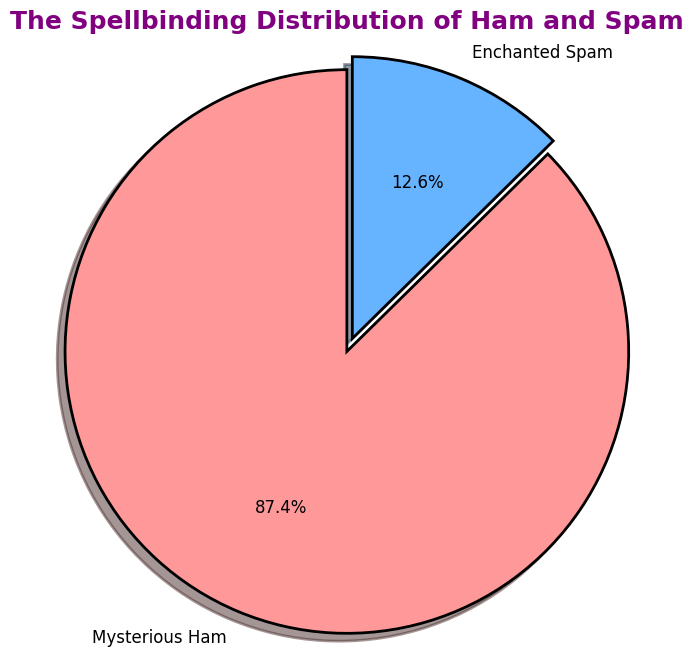

In [21]:
# Invoking the mystical powers of matplotlib for visual sorcery
import matplotlib.pyplot as plt

# Crafting a palette of colors to adorn our pie chart
colors = ['#ff9999', '#66b3ff']

# Let us summon forth the pie chart, a delectable feast for the eyes!
plt.figure(figsize=(8, 8))
plt.pie(df['target'].value_counts(), 
        labels=['Mysterious Ham', 'Enchanted Spam'], 
        autopct="%0.1f%%", 
        colors=colors, 
        startangle=90, 
        explode=(0.05, 0), 
        shadow=True, 
        textprops={'fontsize': 12, 'color': 'black'},
        wedgeprops={'linewidth': 2, 'edgecolor': 'black'})

# As the pie chart dances before us, let us adorn it with a touch of style
plt.title("The Spellbinding Distribution of Ham and Spam", fontsize=18, color='purple', fontweight='bold')

# Let us summon forth this magical creation for all to behold!
plt.axis('equal')
plt.show()


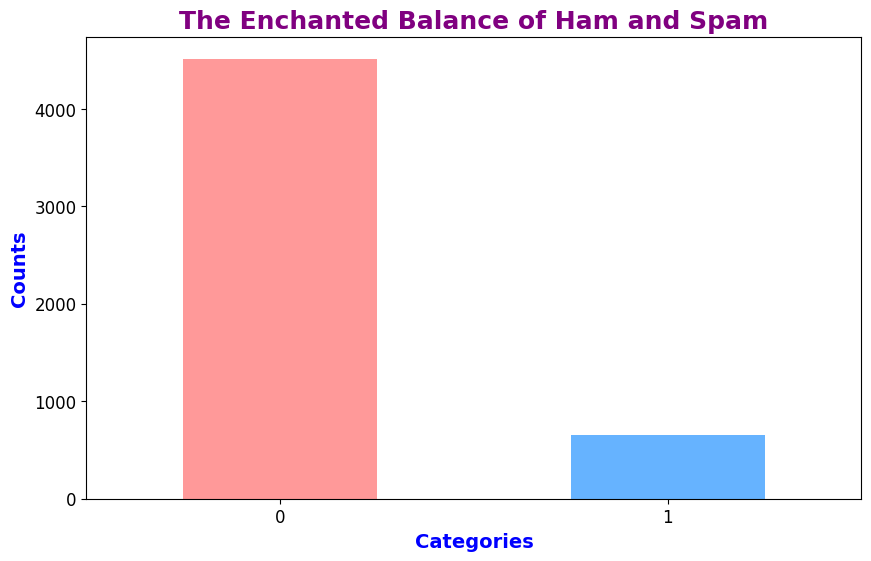

In [22]:
# Invoking the mystical powers of matplotlib for visual sorcery
import matplotlib.pyplot as plt

# Crafting a palette of colors to adorn our bar plot
colors = ['#ff9999', '#66b3ff']

# Let us summon forth the bar plot, a majestic spectacle to behold!
plt.figure(figsize=(10, 6))
df['target'].value_counts().plot(kind='bar', color=colors)

# Adorn our bar plot with a touch of style and enchantment
plt.title("The Enchanted Balance of Ham and Spam", fontsize=18, color='purple', fontweight='bold')
plt.xlabel("Categories", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Counts", fontsize=14, color='blue', fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Let us summon forth this magical creation for all to behold!
plt.show()


In [23]:
# Behold! We shall summon forth the mystical NLTK library
import nltk

# As the digital pages turn, we whisper to NLTK to download the ancient texts of 'punkt'
nltk.download('punkt', quiet=True)

!


In [24]:
df['characters'] = df['text'].apply(len)

In [25]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#for ham messages
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#for spam messages
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

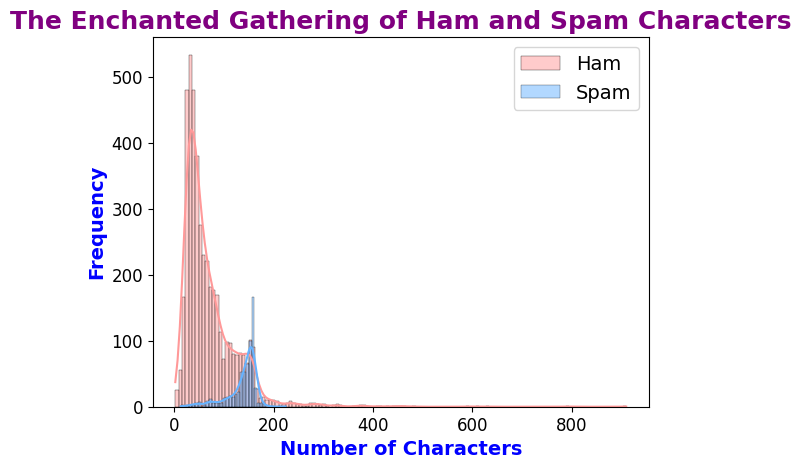

In [33]:

import seaborn as sns

# As the characters gather, we shall paint the 'Ham' histogram with the colors of dawn
sns.histplot(df[df['target'] == 0]['characters'], color='#ff9999', label='Ham', kde=True)

# And as the sun sets, we shall cast a spell to cloak the 'Spam' histogram in the hues of twilight
sns.histplot(df[df['target'] == 1]['characters'], color='#66b3ff', label='Spam', kde=True)

# The characters shall dance amidst the magical mist of kernel density estimation
plt.legend(fontsize=14)

# Let us adorn our plot with a title befitting its mystical nature
plt.title("The Enchanted Gathering of Ham and Spam Characters", fontsize=18, color='purple', fontweight='bold')

# As the stars twinkle above, let us summon forth this bewitching display for all to behold!
plt.xlabel("Number of Characters", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Frequency", fontsize=14, color='blue', fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Let the magical visualization commence!
plt.show()


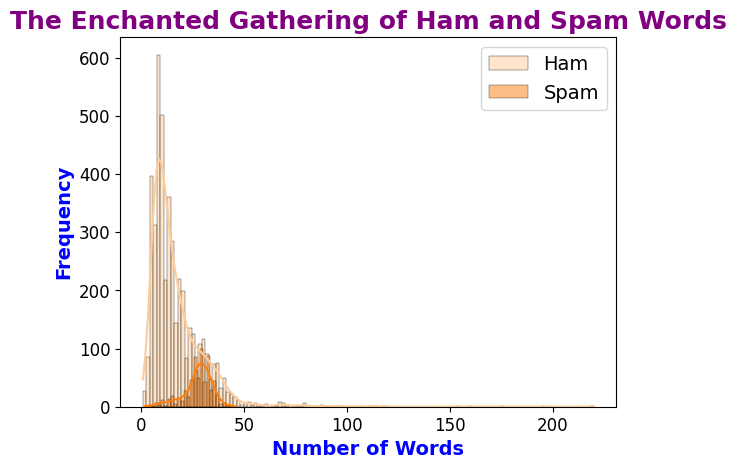

In [34]:

import seaborn as sns

# As the words assemble, we shall paint the 'Ham' histogram with the colors of sunrise
sns.histplot(df[df['target'] == 0]['words'], color='#ffcc99', label='Ham', kde=True)

# And as the shadows lengthen, we shall cast a spell to cloak the 'Spam' histogram in the hues of sunset
sns.histplot(df[df['target'] == 1]['words'], color='#ff7f0e', label='Spam', kde=True)

# The words shall dance amidst the magical mist of kernel density estimation
plt.legend(fontsize=14)

# Let us adorn our plot with a title befitting its mystical nature
plt.title("The Enchanted Gathering of Ham and Spam Words", fontsize=18, color='purple', fontweight='bold')

# As the stars twinkle above, let us summon forth this bewitching display for all to behold!
plt.xlabel("Number of Words", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Frequency", fontsize=14, color='blue', fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Let the magical visualization commence!
plt.show()


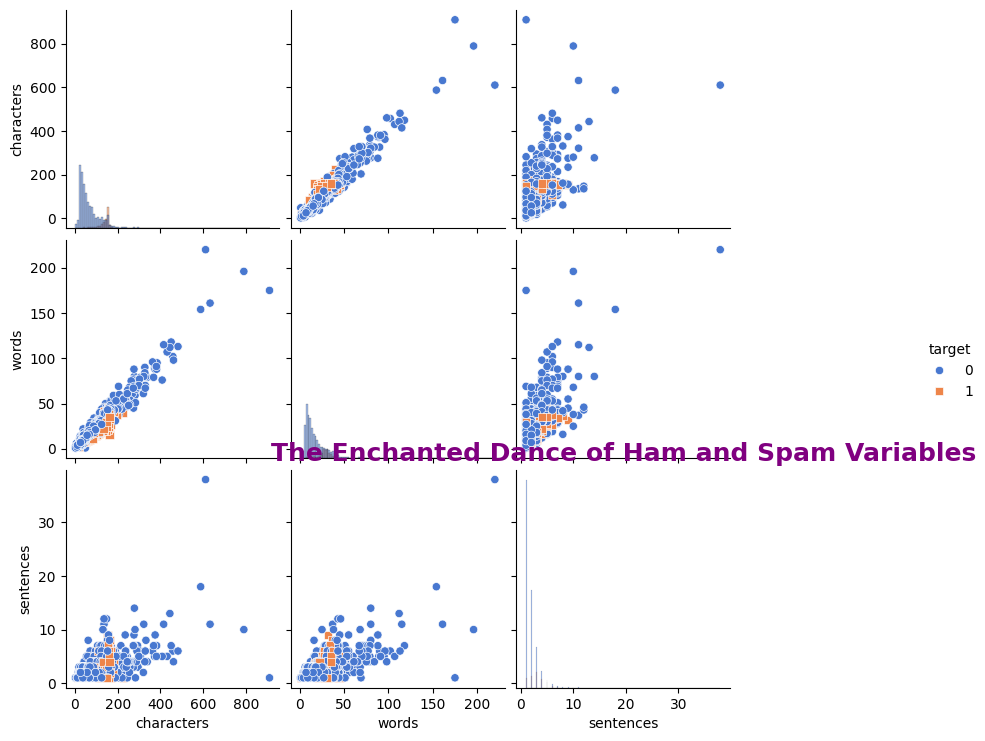

In [35]:

import seaborn as sns

# As the variables converge, we shall infuse the pair plot with the colors of the rainbow
sns.pairplot(df, hue='target', palette='muted', markers=['o', 's'], diag_kind='hist')

# Let the magical symbols of 'Ham' and 'Spam' guide our journey through the realms of correlation
plt.title("The Enchanted Dance of Ham and Spam Variables", fontsize=18, color='purple', fontweight='bold')

# As the stars twinkle above, let us summon forth this bewitching display for all to behold!
plt.xlabel("Variables", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Variables", fontsize=14, color='blue', fontweight='bold')

# Let the magical visualization commence!
plt.show()


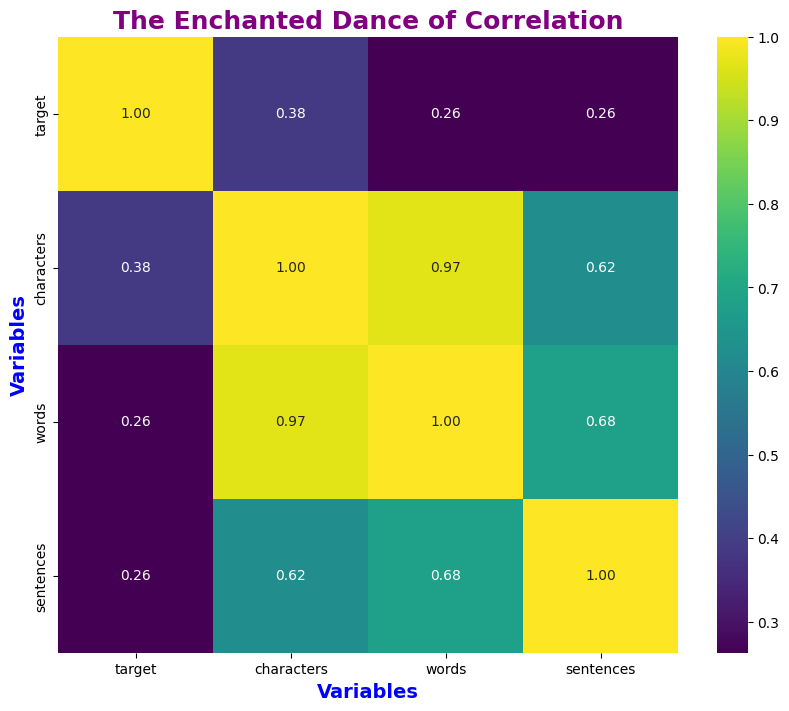

In [37]:
# Summoning the magical seaborn library
import seaborn as sns

# Selecting only the numeric variables from our dataframe to create the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int32', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# As the numerical essence converges, we shall infuse the heatmap with the colors of the aurora borealis
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, cmap='viridis', annot=True, fmt=".2f")

# Let the magical symbols of correlation guide our journey through the mystical matrix
plt.title("The Enchanted Dance of Correlation", fontsize=18, color='purple', fontweight='bold')

# As the stars twinkle above, let us summon forth this bewitching display for all to behold!
plt.xlabel("Variables", fontsize=14, color='blue', fontweight='bold')
plt.ylabel("Variables", fontsize=14, color='blue', fontweight='bold')

# Let the magical visualization commence!
plt.show()


Data Preprocessing

In [41]:
# Summoning the mystical powers of NLTK
import nltk

# As the winds of magic blow, let us summon forth the missing resource 'stopwords'
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
# Summoning the mystical powers of NLTK and string manipulation
import nltk
import string

# Unveiling the arsenal of punctuation from the mystical string library
string.punctuation

# Delving into the ancient tome of words to uncover the sacred lexicon of English stopwords
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

# From the depths of linguistic alchemy, we summon forth the mighty PorterStemmer to wield the power of stemming!
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [47]:
def transform(text):                          
    # Prepare for the mystical transformation of text!
    text = text.lower()                     # Lower_case: Let the text descend into the realm of lowercase letters
    
    # Behold! We shall now tokenize the words, granting them the power of individuality!
    text = nltk.word_tokenize(text)         # Word_tokenization: Let the words break free from their chains
    
    # Prepare the cauldron, for we must brew a potion to cleanse the text of non alpha-numeric characters!
    y=[]
    for i in text:
        if i.isalnum():                     # Removing non alpha-numeric characters: Let only the letters and numbers remain
            y.append(i)
            
    text = y[:]                            # Ah, the text hath been cleansed! Let us proceed with caution
    y.clear()
    
    # With a wave of our wand, we shall banish the dreaded stopwords and punctuations from the text!
    for i in text:
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]                            # The text hath been purified! But our quest is not yet complete
    y.clear()
    
    # As the moon rises and the stars align, we shall invoke the power of stemming upon the words!
    for i in text:
        y.append(ps.stem(i))                # Stemming: Let the words be reborn in their simplest form
            
    # The transformation is complete! Let us join the words together once more and behold the enchanted text
    return " ".join(y)


In [48]:
df['transformed_text'] = df['text'].apply(transform)

In [49]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud


wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')




In [51]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))



(-0.5, 499.5, 499.5, -0.5)

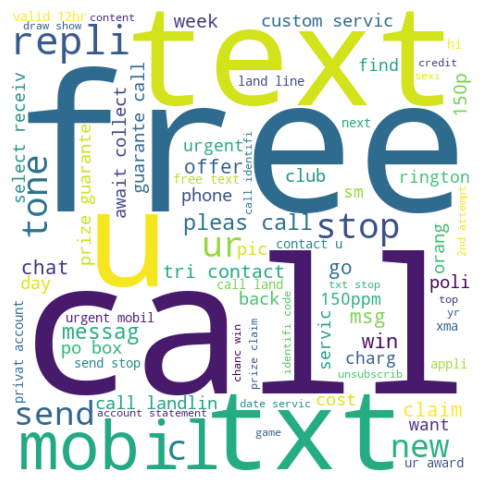

In [52]:

plt.figure(figsize=(13, 6))

# As the stars twinkle above, let us adorn our canvas with the ethereal beauty of the Word Cloud
plt.imshow(spam_wc, interpolation='bilinear')

# Behold! The words of spam converge in a mesmerizing dance of deception and allure, illuminated by the moonlight's gentle embrace!

# Let us sprinkle a touch of magic upon our creation, as we cast a spell to hide the axis ticks and labels
plt.axis('off')



In [53]:

ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

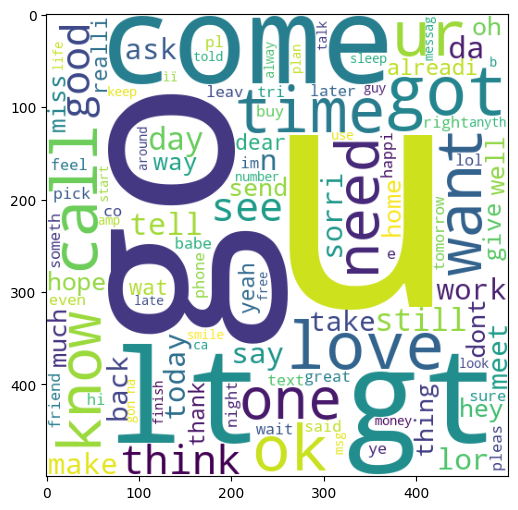

In [54]:
#for ham messages
plt.figure(figsize=(13,6))        
plt.imshow(ham_wc)

In [55]:
# Prepare for a grand adventure as we journey through the realms of spam, gathering words like treasure along the way!
spam_corpus = []

# As we traverse the digital landscape, each word shall be plucked from the messages of spam, like stars from the night sky!
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)



In [56]:
len(spam_corpus)

9939

C:\Users\user\AppData\Local\Temp\ipykernel_23932\379673461.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=word_counts_df, palette='magma')


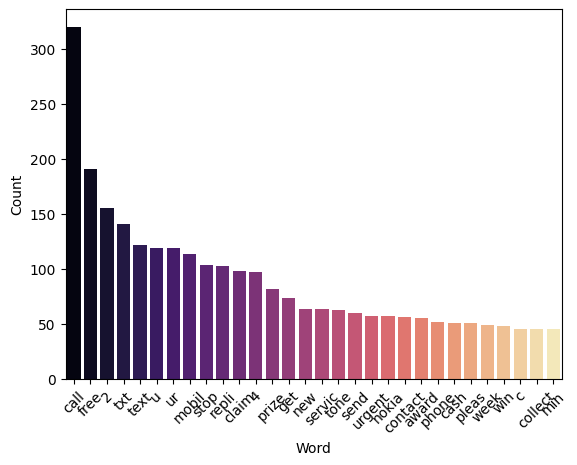

In [57]:
# Prepare for a grand spectacle as we unveil the secrets of spam, revealing the most notorious words of deception!
from collections import Counter

# Behold! We shall now unleash the power of the Counter to tally the occurrences of each word in our spam corpus
word_counter = Counter(spam_corpus)

# As the words of deceit gather, we shall now craft a magnificent chart to showcase their nefarious deeds!
word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

# With each word vying for attention, we shall summon forth the mystical powers of seaborn to create our chart!
sns.barplot(x='Word', y='Count', data=word_counts_df, palette='magma')

# Let the colors dance like flames of deception, illuminating the darkest corners of our spam treasure trove!

# As the plot takes shape, let us adorn it with a touch of whimsy by rotating the word labels
plt.xticks(rotation=45)

# Behold! The chart of deceit is complete, revealing the most notorious words of spam in all their glory!
plt.show()


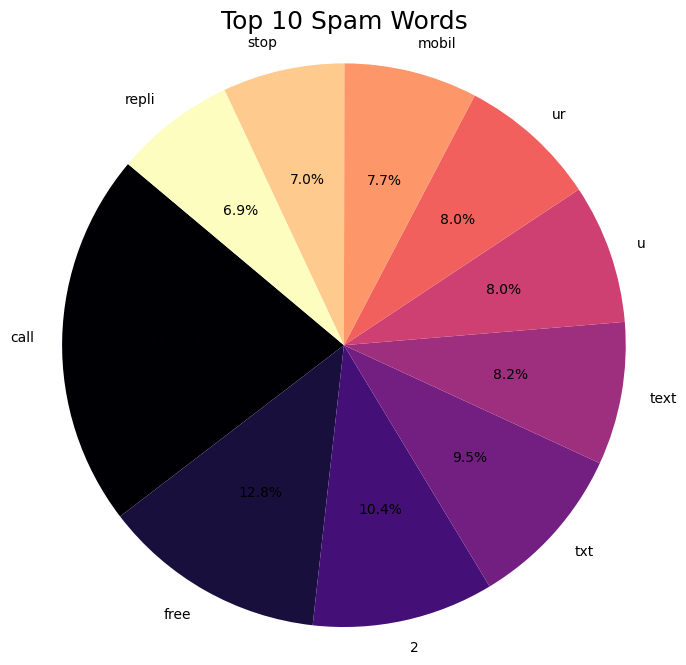

In [58]:
# Prepare for a whimsical journey as we unveil the distribution of spam words through the enchanted realm of pie charts!
from collections import Counter

# Embrace the power of the Counter to tally the occurrences of each word in our spam corpus
word_counter = Counter(spam_corpus)

# Prepare the ingredients for our pie chart, where each slice shall represent a word of deceit!
word_counts_df = pd.DataFrame(word_counter.most_common(10), columns=['Word', 'Count'])

# As the words of deception converge, let us summon forth the mystical powers of matplotlib to create our pie chart!
plt.figure(figsize=(8, 8))
plt.pie(word_counts_df['Count'], labels=word_counts_df['Word'], autopct='%1.1f%%', startangle=140, colors=plt.cm.magma(np.linspace(0, 1, 10)))

# Let the colors swirl like the flames of deception, illuminating the darkest corners of our spam treasure trove!

# As the pie chart dances before us, let us adorn it with a touch of whimsy by adding a title
plt.title('Top 10 Spam Words', fontsize=18)

# Behold! The pie chart of deceit is complete, revealing the distribution of the most notorious words of spam in all their glory!
plt.axis('equal')  # Ensure that pie is drawn as a circle.

# Let us now summon forth this bewitching display for all to behold!
plt.show()


In [59]:
# Prepare for a tranquil journey as we traverse the realm of 'Ham', gathering words like gentle whispers along the way!
ham_corpus = []

# As we journey through the serene landscape, each word shall be collected from the messages of 'Ham', like petals from a blossoming flower!
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)



In [60]:
len(ham_corpus)

35404

C:\Users\user\AppData\Local\Temp\ipykernel_23932\829666451.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=word_counts_df2, palette='winter')


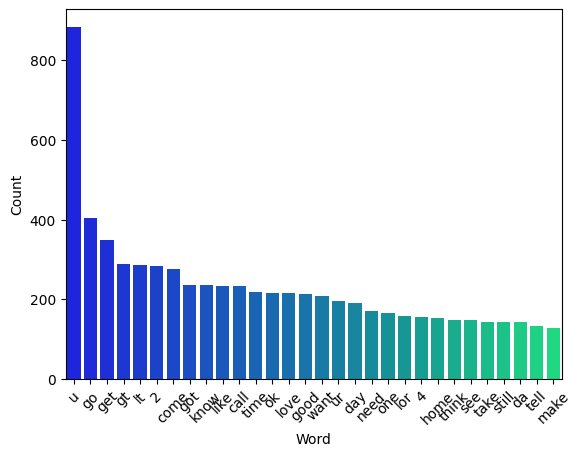

In [61]:
# Prepare for a tranquil spectacle as we unveil the essence of 'Ham' through the whimsical artistry of a barplot!
from collections import Counter

# Embrace the power of the Counter to tally the occurrences of each word in our 'Ham' corpus
word_counter2 = Counter(ham_corpus)

# Prepare the ingredients for our barplot, where each bar shall represent a word of everyday discourse!
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

# As the words of everyday life gather, let us summon forth the mystical powers of seaborn to create our barplot!
sns.barplot(x='Word', y='Count', data=word_counts_df2, palette='winter')

# Let the colors of winter embrace the gentle words of 'Ham', illuminating the canvas with shades of tranquility!

# As the plot takes shape, let us adorn it with a touch of whimsy by rotating the word labels
plt.xticks(rotation=45)

# Behold! The barplot of 'Ham' is complete, revealing the most common words of everyday discourse in all their glory!
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23932\1731200174.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Count', y='Word', data=word_counts_df2, palette='winter')


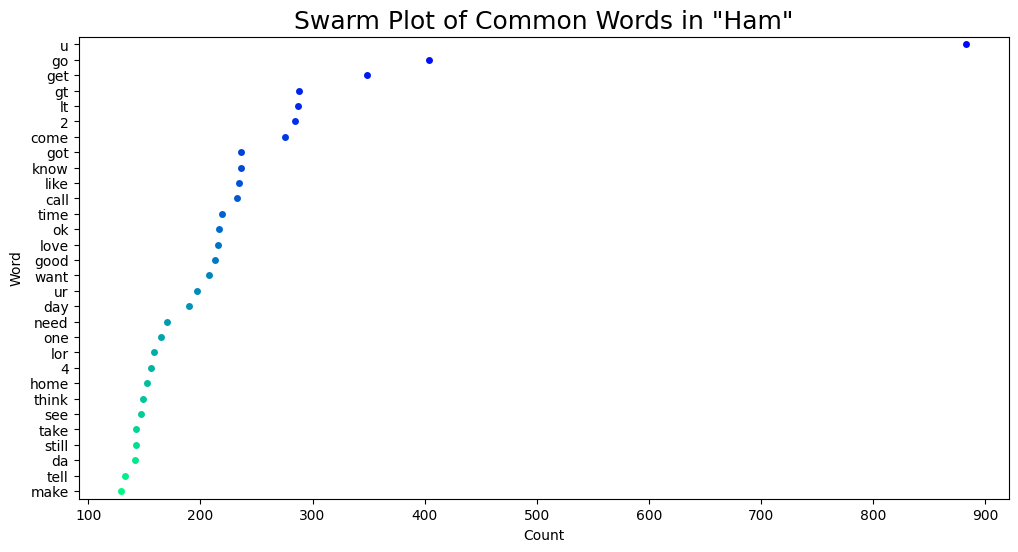

In [63]:
# Prepare for an enchanting spectacle as we unveil the essence of 'Ham' through the mesmerizing artistry of a swarm plot!
import seaborn as sns

# Prepare the ingredients for our swarm plot, where each word shall take flight like a gentle sprite of discourse!
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

# As the words of everyday life gather, let us summon forth the mystical powers of seaborn to create our swarm plot!
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Count', y='Word', data=word_counts_df2, palette='winter')

# Let the gentle words of 'Ham' take flight, like sprites dancing in the moonlight, illuminating the canvas with their tranquility!

# As the plot takes shape, let us adorn it with a touch of whimsy by adding a title
plt.title('Swarm Plot of Common Words in "Ham"', fontsize=18)

# Behold! The swarm plot of 'Ham' is complete, revealing the most common words of everyday discourse in a mesmerizing dance of tranquility!
plt.show()


Model Building

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5169, 3000)

In [67]:
y = df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import MultinomialNB                  #performs best with best precision
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb = MultinomialNB()

In [72]:
#Here MultinomialNB is best, as data is imbalanced, so precision matters alot.
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred2))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Print precision score
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [76]:
import pickle

# Load the TF-IDF vectorizer and the trained Multinomial Naive Bayes model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
mnb = pickle.load(open('model.pkl', 'rb'))

# Function to preprocess and classify the input text
def classify_spam(input_text):
    # Preprocess the input text using the same preprocessing steps
    transformed_text = transform(input_text)
    
    # Transform the preprocessed text using the TF-IDF vectorizer
    X_input = tfidf.transform([transformed_text]).toarray()
    
    # Use the trained model to predict whether the input text is spam or not
    prediction = mnb.predict(X_input)
    
    # Return the prediction result
    return prediction[0]

# Test the model with input text
input_text = "Hi, this is John from the marketing team. We would like to offer you a special discount on our latest product. Click the link to find out more!"

# Fit the TF-IDF vectorizer to your data
tfidf.fit(df['transformed_text'])

# Now classify the spam
if classify_spam(input_text):
    print("This email is likely spam.")
else:
    print("This email is likely not spam.")


This email is likely not spam.
